### Author : Anju Sukumaran
### GRIP   :  The Sparks Foundation
### Task   :  Prediction using Supervised ML

Importing libraries

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
df=pd.read_csv('/kaggle/input/iriscsv/Iris.csv')

### Data Exploration

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
print('Shape of the dataset : ',df.shape)

Shape of the dataset :  (150, 6)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [7]:
#checking for null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### EDA

<Axes: xlabel='Species', ylabel='count'>

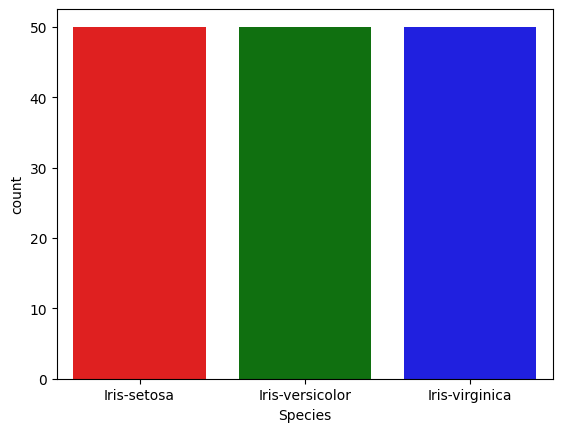

In [8]:
sns.countplot(x='Species',data=df,palette=['r','g','b'])

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

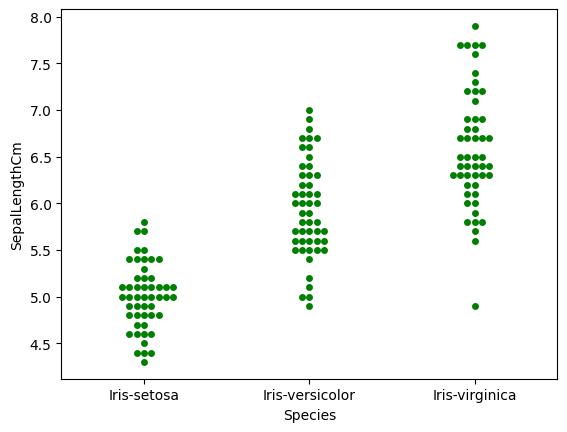

In [9]:
#analysing distribution of columns values
sns.swarmplot(x=df['Species'],y=df['SepalLengthCm'],color='g')

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

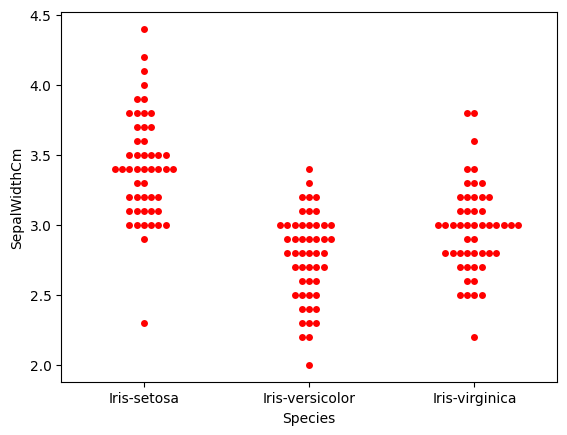

In [10]:
sns.swarmplot(x=df['Species'],y=df['SepalWidthCm'],color='r')

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

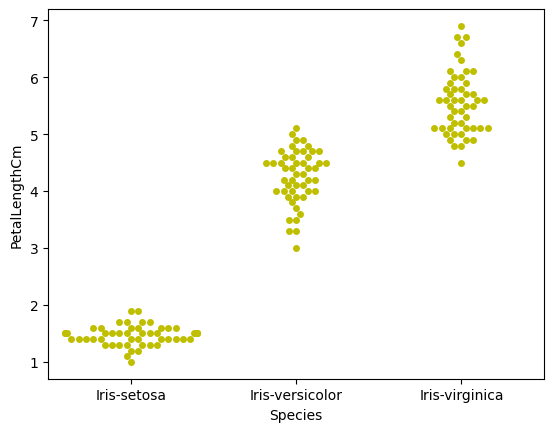

In [11]:
sns.swarmplot(x=df['Species'],y=df['PetalLengthCm'],color='y')

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

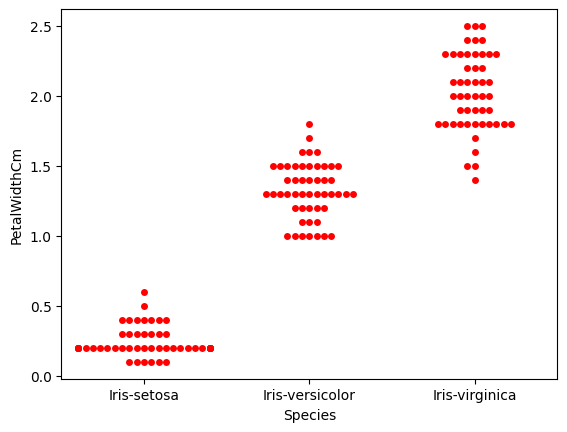

In [12]:
sns.swarmplot(x=df['Species'],y=df['PetalWidthCm'],color='r')

#### Analaysing the distribution of each feature using histogram

<Axes: >

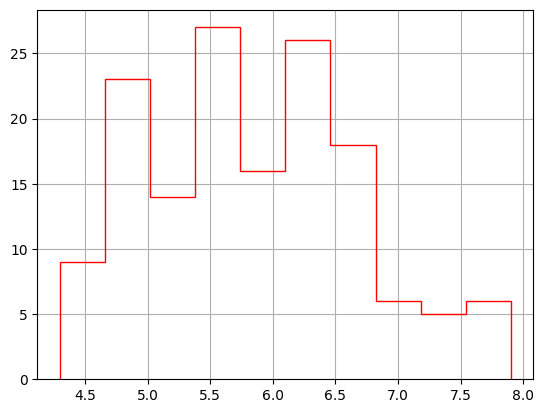

In [13]:
df['SepalLengthCm'].hist(histtype='step',color='r')

<Axes: >

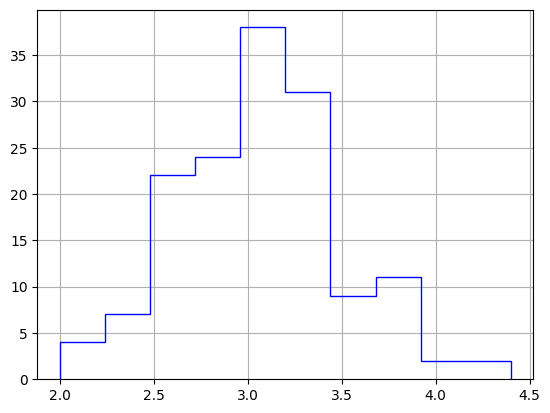

In [14]:
df['SepalWidthCm'].hist(histtype='step',color='b')

<Axes: >

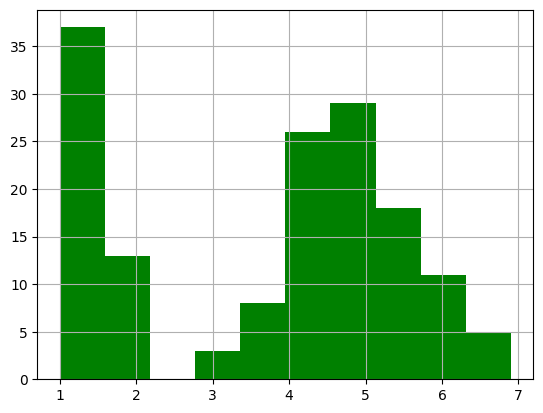

In [15]:
df['PetalLengthCm'].hist(histtype='bar',color='g')

<Axes: >

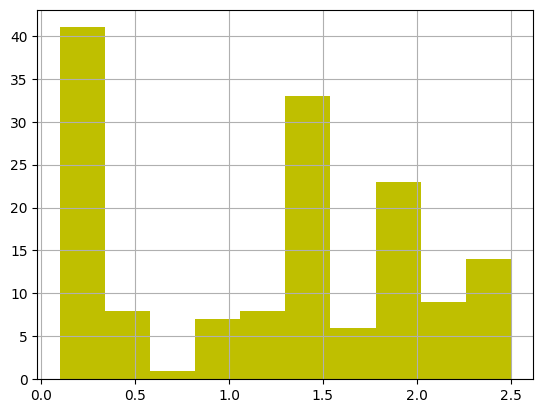

In [16]:
df['PetalWidthCm'].hist(histtype='stepfilled',color='y')

<Axes: >

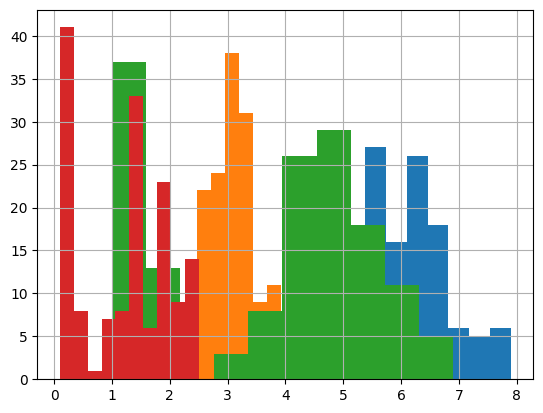

In [17]:
#plotting all toghether
df['SepalLengthCm'].hist()
df['SepalWidthCm'].hist()
df['PetalLengthCm'].hist()
df['PetalWidthCm'].hist()

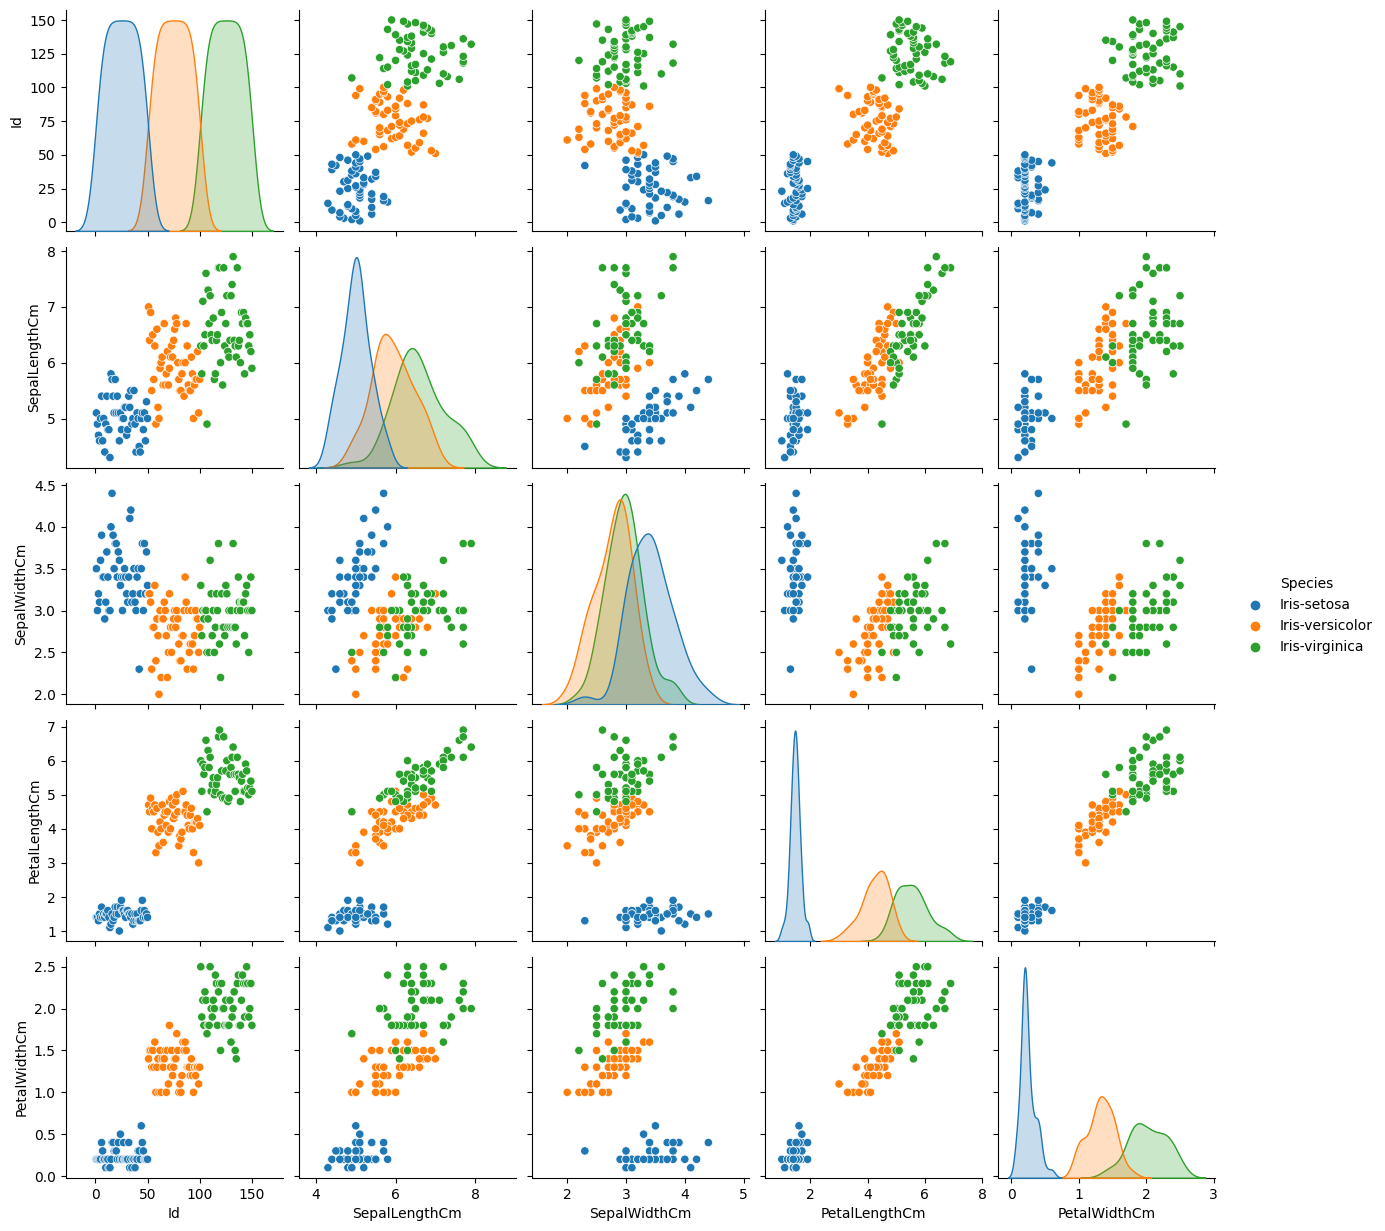

In [18]:
sns.pairplot(df,hue='Species')

In [19]:
df=df.drop('Id',axis=1)

In [20]:
X=(df.drop('Species',axis=1)).values
y=df['Species']

In [21]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

### Model Building

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dtc=DecisionTreeClassifier(random_state=0)

In [24]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
pred=dtc.predict(X_test)
a=accuracy_score(y_test,pred)
print("Accuracy Decision Tree Classifier : ",round(accuracy_score(y_test,pred),4)*100, '%')

Accuracy Decision Tree Classifier :  100.0 %


#### Visualizing the Model

In [27]:
from sklearn import tree

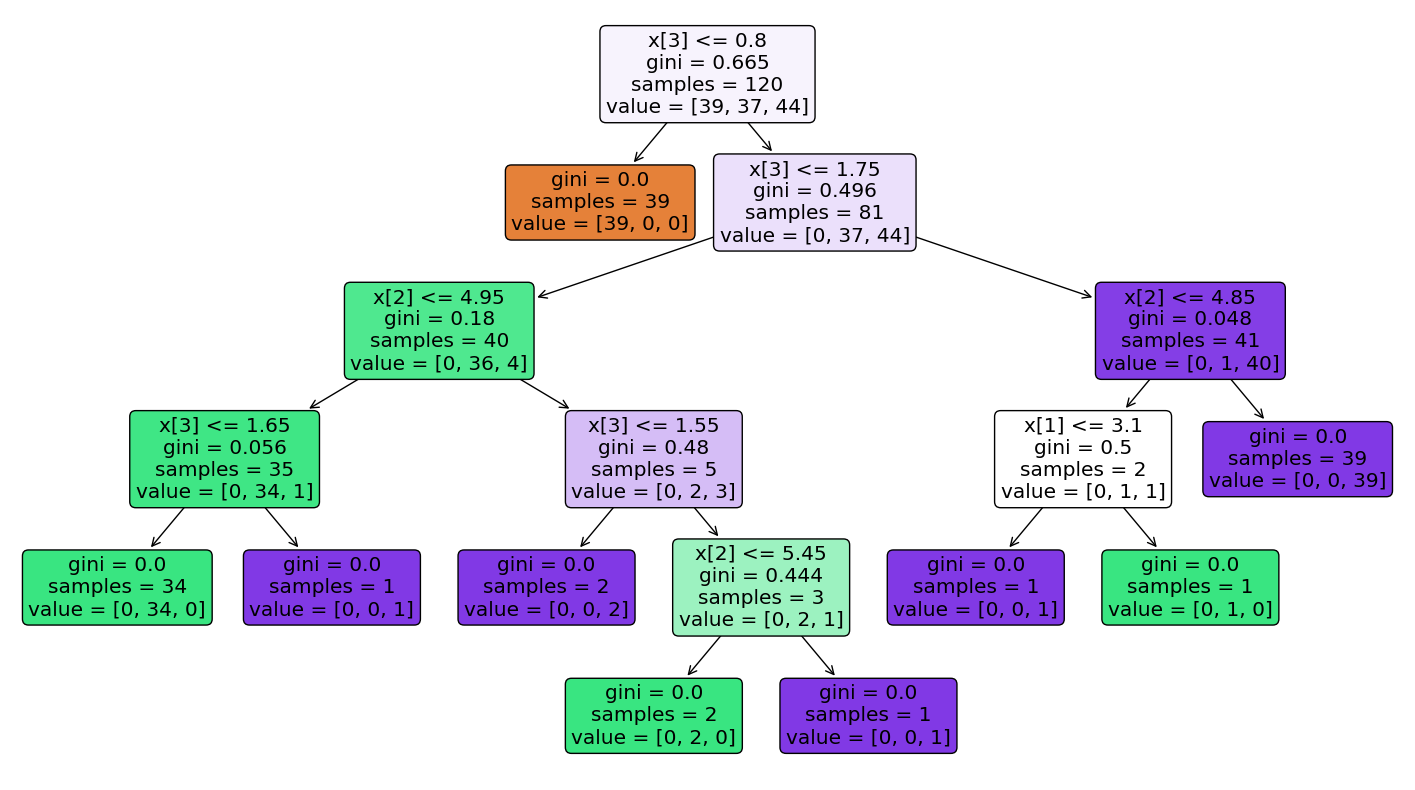

In [28]:
plt.figure(figsize=(18,10))
tree.plot_tree(dtc,rounded=True,filled=True)
plt.show()